In [2]:
%matplotlib widget
# %matplotlib ipympl

import pandas as pd
import datetime
import matplotlib.pyplot as plt
import random
from statistics import mean

import util.benchmark as benchmark
import util.plotting as plotting
import util.states.graph as statesgraph
import util.states.plotting as statesplotting

import math

# Naive

In [3]:
def naiveMaxSubArray(n,nums):
    bestSum = nums[0]

    for i in range(len(nums)):
        for j in range(i, len(nums)):
            total = 0
            for k in range(i,j+1):
                total += nums[k]
            bestSum = max(bestSum, total)

    return bestSum

In [3]:
print(naiveMaxSubArray(8,[1,-3,4,-1,2,2,-3,4]))

8


## Complejidad

In [4]:
N = 500
ITS = 30
Ns = list(range(1,N+1, int(N/ITS)))

In [5]:
cases = [(n,[e for e in range(n)]) for idx, n in enumerate(Ns)]
results = benchmark.benchmarkFuncForCases(1, naiveMaxSubArray, cases, copyCase = False)

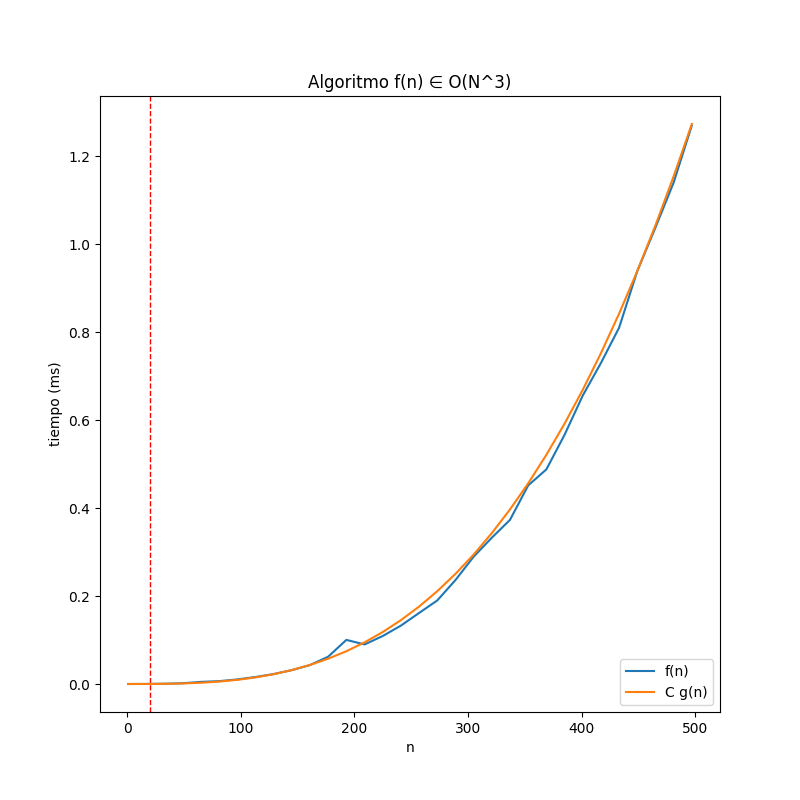

In [6]:
onlogn = lambda _, elems: len(elems)**3
plotting.plotFuncBigOAnalysis(Ns, cases, results, "N^3", onlogn, 20)

# Divide & Conquer

In [4]:
someGraph = statesgraph.StatesGraph()
@statesplotting.trackStatesGraph(someGraph)
def maxSubArray(n,nums):
    if len(nums) == 1:
        return nums[0]

    m = int(len(nums)/2)
    leftMax = maxSubArray(m,nums[:m])
    rightMax = maxSubArray(m,nums[m:])

    ls = 0
    bestLeft = nums[m-1]
    for i in range(m-1,-1,-1):
        ls += nums[i]
        bestLeft = max(bestLeft, ls)
    
    rs = 0
    bestRight = nums[m]
    for i in range(m, len(nums)):
        rs += nums[i]
        bestRight = max(bestRight, rs)

    return max(leftMax, rightMax, bestLeft + bestRight)

In [5]:
print(maxSubArray(8,[1,-3,4,-1,2,2,-3,4]))
net = statesplotting.drawTreeGraph(someGraph)
net.show("fibo_no_memo.html")

8
fibo_no_memo.html


## Complejidad

In [9]:
N = 100000
ITS = 30
Ns = list(range(1,N+1, int(N/ITS)))

In [10]:
cases = [(n,[e for e in range(n)]) for idx, n in enumerate(Ns)]
results = benchmark.benchmarkFuncForCases(1, maxSubArray, cases, copyCase = False)

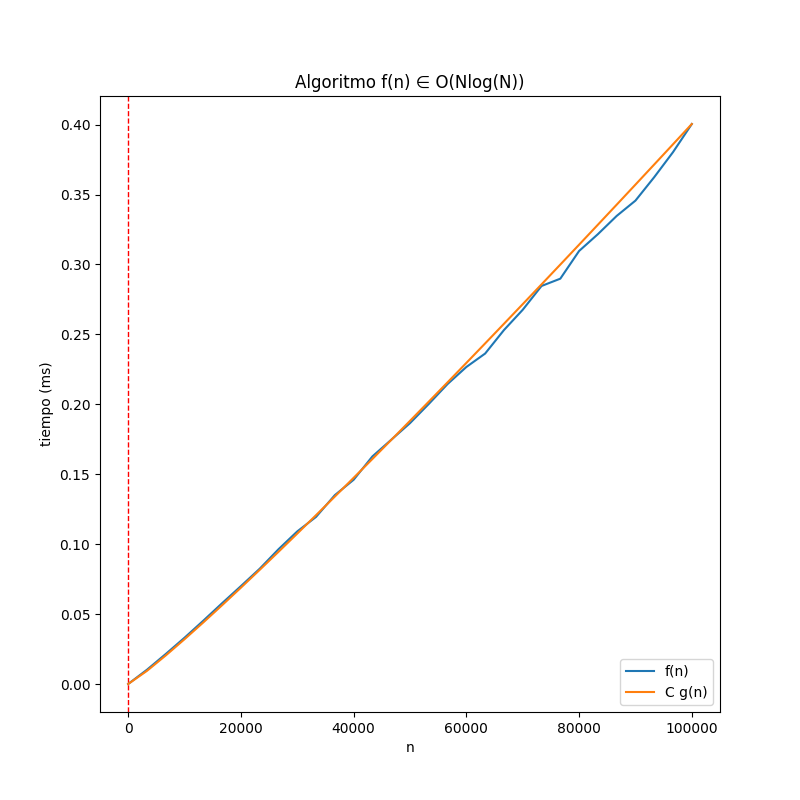

In [11]:
import math
onlogn = lambda _, elems: len(elems) * math.log2(len(elems))
plotting.plotFuncBigOAnalysis(Ns, cases, results, "Nlog(N)", onlogn, 20)